In [1]:
# для работы с файловой системой
import os

# иногда "pip install ultralytics" ругается на кодировку при повторной установке
os.environ['LC_ALL'] = 'en_US.UTF-8'
os.environ['LANG'] = 'en_US.UTF-8'

In [2]:
# Для вывода результата детектирования после обучения YOLOv9
from IPython.display import display, Image
from IPython import display

In [3]:
#Устанавливаем YOLO и библиотеку OpenCV
!pip install ultralytics -q
!pip install opencv-python -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.4/750.4 kB 6.2 MB/s eta 0:00:00


In [4]:
# Импорт библиотек
from ultralytics import YOLO #библиотека для работы с YOLOv9
import cv2 #библиотека для работ c OpenCV
import os #бибиотека для работы с файловой системой
import numpy as np
import matplotlib.pyplot as plt

#Подключаем Google disc с картинкой для распознавания
from google.colab import drive # подключаем гугл драйв диск для загрузки файлов
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
model_K = YOLO("yolov9c.pt") #K - это каски

#указываем пути для сохранения данных
data_path = '/content/drive/MyDrive/datasets/shod-heavy/'

yaml_path = data_path + 'data.yaml'# защитные каски
project_path = data_path + 'Ural'

100%|██████████| 49.4M/49.4M [00:00<00:00, 111MB/s]


### Обучение модели YOLOv9

In [6]:
# Загрузка весов
#model_K.load(data_path+ 'ural_weights_20_ep_4.pt')

In [7]:
%%time

epochs = 20

results = model_K.train(data=yaml_path, # путь к yaml файлу с данными для обучения
                        imgsz = 1280, # размер изображения
                        epochs=epochs, # количество эпох обучения
                        pretrained=False, # убираем предварительное обучение, т.к. классы обучения пересекаются
                        augment=True, # включаем аугментацию обучающей выборки  # как проверить что работает?
                        iou=0.5, #iou - intersection over union
                        visualize=True, # дополнительная визуализация обучения
                        patience=0,
                        save = True,
                        save_period = 5, # сохранять веса каждые 5 эпох
                        val = True, #
                        cache = True, # использование кэша картинок для обучения, обучение должно проходить быстрее
                        project = project_path # для сохранения информации об обучении к себе на гугл диск
                        # , resume = True  # параметр для доубечения модели после загрузки весов, !!!почему то не работает!!!
                        )

#model_K.save(data_path+ 'ural_weights_20_ep_4.pt') #сохраняем модель после обучения

Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov9c.pt, data=/content/drive/MyDrive/datasets/shod-heavy/data.yaml, epochs=20, time=None, patience=0, batch=16, imgsz=1280, save=True, save_period=5, cache=True, device=None, workers=8, project=/content/drive/MyDrive/datasets/shod-heavy/Ural, name=train, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.5, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=True, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=Fa

100%|██████████| 22.2M/22.2M [00:00<00:00, 314MB/s]


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    212864  ultralytics.nn.modules.block.RepNCSPELAN4    [128, 256, 128, 64, 1]        
  3                  -1  1    164352  ultralytics.nn.modules.block.ADown           [256, 256]                    
  4                  -1  1    847616  ultralytics.nn.modules.block.RepNCSPELAN4    [256, 512, 256, 128, 1]       
  5                  -1  1    656384  ultralytics.nn.modules.block.ADown           [512, 512]                    
  6                  -1  1   2857472  ultralytics.nn.modules.block.RepNCSPELAN4    [512, 512, 512, 256, 1]       
  7                  -1  1    656384  ultralytic

100%|██████████| 6.23M/6.23M [00:00<00:00, 342MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/datasets/shod-heavy/train/labels... 4989 images, 129 backgrounds, 0 corrupt: 100%|██████████| 4989/4989 [15:11<00:00,  5.47it/s]


train: New cache created: /content/drive/MyDrive/datasets/shod-heavy/train/labels.cache


train: Caching images (22.8GB RAM): 100%|██████████| 4989/4989 [00:42<00:00, 117.75it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/datasets/shod-heavy/valid/labels... 1711 images, 47 backgrounds, 0 corrupt: 100%|██████████| 1711/1711 [05:56<00:00,  4.81it/s]


val: New cache created: /content/drive/MyDrive/datasets/shod-heavy/valid/labels.cache


val: Caching images (7.8GB RAM): 100%|██████████| 1711/1711 [00:19<00:00, 89.85it/s]


Plotting labels to /content/drive/MyDrive/datasets/shod-heavy/Ural/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1280 train, 1280 val
Using 8 dataloader workers
Logging results to /content/drive/MyDrive/datasets/shod-heavy/Ural/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      41.8G      2.572      5.898      2.311        279       1280:   1%|          | 3/312 [00:03<05:30,  1.07s/it]

       1/20      5.82G      2.568      5.998      2.293        273       1280:   2%|▏         | 6/312 [00:05<04:26,  1.15it/s]
100%|██████████| 755k/755k [00:00<00:00, 92.5MB/s]
       1/20      40.9G      1.524      1.319      1.391        147       1280: 100%|██████████| 312/312 [03:34<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:27<00:00,  1.99it/s]


                   all       1711      17709      0.673      0.667      0.658      0.314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      40.9G       1.26     0.7066      1.235        169       1280: 100%|██████████| 312/312 [03:23<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:26<00:00,  2.08it/s]

                   all       1711      17709      0.701      0.683      0.696      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      40.9G      1.153     0.6306      1.178        152       1280: 100%|██████████| 312/312 [03:21<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:25<00:00,  2.10it/s]

                   all       1711      17709      0.682       0.71      0.717      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      40.8G      1.055       0.58      1.139        183       1280: 100%|██████████| 312/312 [03:20<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:25<00:00,  2.10it/s]

                   all       1711      17709       0.84      0.703      0.738      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      40.9G     0.9806       0.53      1.099        217       1280: 100%|██████████| 312/312 [03:20<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:25<00:00,  2.08it/s]

                   all       1711      17709      0.843      0.741      0.772      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      40.8G     0.9179     0.4989      1.073        170       1280: 100%|██████████| 312/312 [03:20<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:25<00:00,  2.08it/s]

                   all       1711      17709      0.848       0.75      0.789      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      40.8G     0.8796     0.4757       1.06        173       1280: 100%|██████████| 312/312 [03:20<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:25<00:00,  2.12it/s]

                   all       1711      17709      0.861      0.744      0.812      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      40.9G      0.821     0.4468       1.04        136       1280: 100%|██████████| 312/312 [03:19<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:25<00:00,  2.11it/s]

                   all       1711      17709      0.849      0.768      0.816      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      40.8G     0.7968     0.4343       1.03        158       1280: 100%|██████████| 312/312 [03:19<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:25<00:00,  2.09it/s]

                   all       1711      17709      0.789      0.814      0.834      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      41.7G     0.7464     0.4091      1.006        119       1280: 100%|██████████| 312/312 [03:19<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:25<00:00,  2.11it/s]

                   all       1711      17709      0.809      0.843      0.849      0.537


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      41.6G      1.239      0.627      1.358        110       1280: 100%|██████████| 312/312 [03:22<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:25<00:00,  2.10it/s]

                   all       1711      17709      0.823      0.845      0.863      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      41.6G      1.182     0.5927      1.315        129       1280: 100%|██████████| 312/312 [03:18<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:25<00:00,  2.11it/s]

                   all       1711      17709       0.86       0.84      0.879      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      41.6G      1.124     0.5589      1.283        139       1280: 100%|██████████| 312/312 [03:18<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:25<00:00,  2.10it/s]

                   all       1711      17709      0.827      0.865      0.892      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      41.6G      1.075     0.5338      1.249        115       1280: 100%|██████████| 312/312 [03:18<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:25<00:00,  2.11it/s]

                   all       1711      17709      0.846      0.865      0.909      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      41.7G      1.027     0.5088      1.217         99       1280: 100%|██████████| 312/312 [03:18<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:25<00:00,  2.11it/s]

                   all       1711      17709      0.885       0.89      0.916      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      40.6G     0.9818     0.4837      1.184        145       1280: 100%|██████████| 312/312 [03:18<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:25<00:00,  2.12it/s]

                   all       1711      17709      0.878      0.898      0.918      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      41.8G     0.9378     0.4645      1.163         86       1280: 100%|██████████| 312/312 [03:18<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:25<00:00,  2.10it/s]

                   all       1711      17709        0.9      0.898      0.923      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      41.7G     0.8984     0.4457      1.139        142       1280: 100%|██████████| 312/312 [03:18<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:25<00:00,  2.11it/s]

                   all       1711      17709      0.871      0.909      0.927      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      41.6G     0.8622     0.4282      1.116        130       1280: 100%|██████████| 312/312 [03:18<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:25<00:00,  2.12it/s]

                   all       1711      17709      0.881      0.918      0.939      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      41.6G     0.8264     0.4098      1.097         96       1280: 100%|██████████| 312/312 [03:18<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:25<00:00,  2.10it/s]

                   all       1711      17709      0.886      0.913      0.944        0.7



20 epochs completed in 1.269 hours.
Optimizer stripped from /content/drive/MyDrive/datasets/shod-heavy/Ural/train/weights/last.pt, 51.8MB
Optimizer stripped from /content/drive/MyDrive/datasets/shod-heavy/Ural/train/weights/best.pt, 51.8MB

Validating /content/drive/MyDrive/datasets/shod-heavy/Ural/train/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv9c summary (fused): 384 layers, 25326958 parameters, 0 gradients, 102.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:54<00:00,  1.02s/it]


                   all       1711      17709      0.893      0.911      0.944      0.693
                 Каска       1711       1771      0.916       0.95      0.965      0.623
              Перчатка       1711       1339      0.811      0.839      0.876      0.567
                 Обувь       1711       1467      0.857       0.96       0.97      0.736
                Одежда       1711       2606      0.966       0.99      0.993      0.791
               Курение       1711        515      0.743      0.874      0.869      0.541
      Каска. Нарушение       1711       2718      0.892      0.962      0.975      0.708
   Перчатка. Нарушение       1711         19      0.916      0.573      0.825      0.394
      Обувью Нарушение       1711       1074      0.889      0.973      0.983       0.81
     Одежда. Нарушение       1711       1816      0.962      0.995      0.991       0.87
               Рабочие       1711       4384      0.973      0.995      0.994      0.893
Speed: 0.5ms preproce

In [8]:
#проверим какие классы детектируются - наши или из коробки
class_names = model_K.names
print(class_names)

{0: 'Каска', 1: 'Перчатка', 2: 'Обувь', 3: 'Одежда', 4: 'Курение', 5: 'Каска. Нарушение', 6: 'Перчатка. Нарушение', 7: 'Обувью Нарушение', 8: 'Одежда. Нарушение', 9: 'Рабочие'}


In [9]:
# оценка модели
results = model_K.val()

Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv9c summary (fused): 384 layers, 25326958 parameters, 0 gradients, 102.4 GFLOPs


val: Scanning /content/drive/MyDrive/datasets/shod-heavy/valid/labels.cache... 1711 images, 47 backgrounds, 0 corrupt: 100%|██████████| 1711/1711 [00:00<?, ?it/s]
val: Caching images (7.8GB RAM): 100%|██████████| 1711/1711 [00:10<00:00, 157.74it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [01:13<00:00,  1.46it/s]


                   all       1711      17709        0.9      0.904      0.944      0.696
                 Каска       1711       1771      0.921      0.948      0.966      0.628
              Перчатка       1711       1339      0.833      0.833      0.879      0.569
                 Обувь       1711       1467      0.869      0.953      0.971      0.739
                Одежда       1711       2606      0.969       0.99      0.993      0.796
               Курение       1711        515      0.751      0.862      0.868      0.547
      Каска. Нарушение       1711       2718      0.902       0.96      0.975      0.713
   Перчатка. Нарушение       1711         19       0.91      0.529      0.825      0.385
      Обувью Нарушение       1711       1074      0.901      0.974      0.983      0.817
     Одежда. Нарушение       1711       1816      0.966      0.995      0.991      0.873
               Рабочие       1711       4384      0.975      0.995      0.994      0.895
Speed: 0.5ms preproce

### Вывод результата обучения (проверка на валидационной выборке)

In [10]:
def path_result(project_path): #получаем путь к папке с результатами последнего обучения

  file_name = "results.csv"

  folder_res = []
  folders = [f for f in os.listdir(project_path) if os.path.isdir(os.path.join(project_path, f))]

  for folder_name in folders:
    folder_path = os.path.join(project_path, folder_name)
    file_path = os.path.join(folder_path, file_name)

    if os.path.isfile(file_path):
        folder_res.append(folder_name)

  last_path = max(folder_res, key=lambda x: int(x.lstrip("train")) if x.lstrip("train").isdigit() else 0)
  print(project_path +'/'+ last_path+ '/')
  return project_path +'/'+ last_path+ '/'

In [11]:
path_result = path_result(project_path)

/content/drive/MyDrive/datasets/shod-heavy/Ural/train/


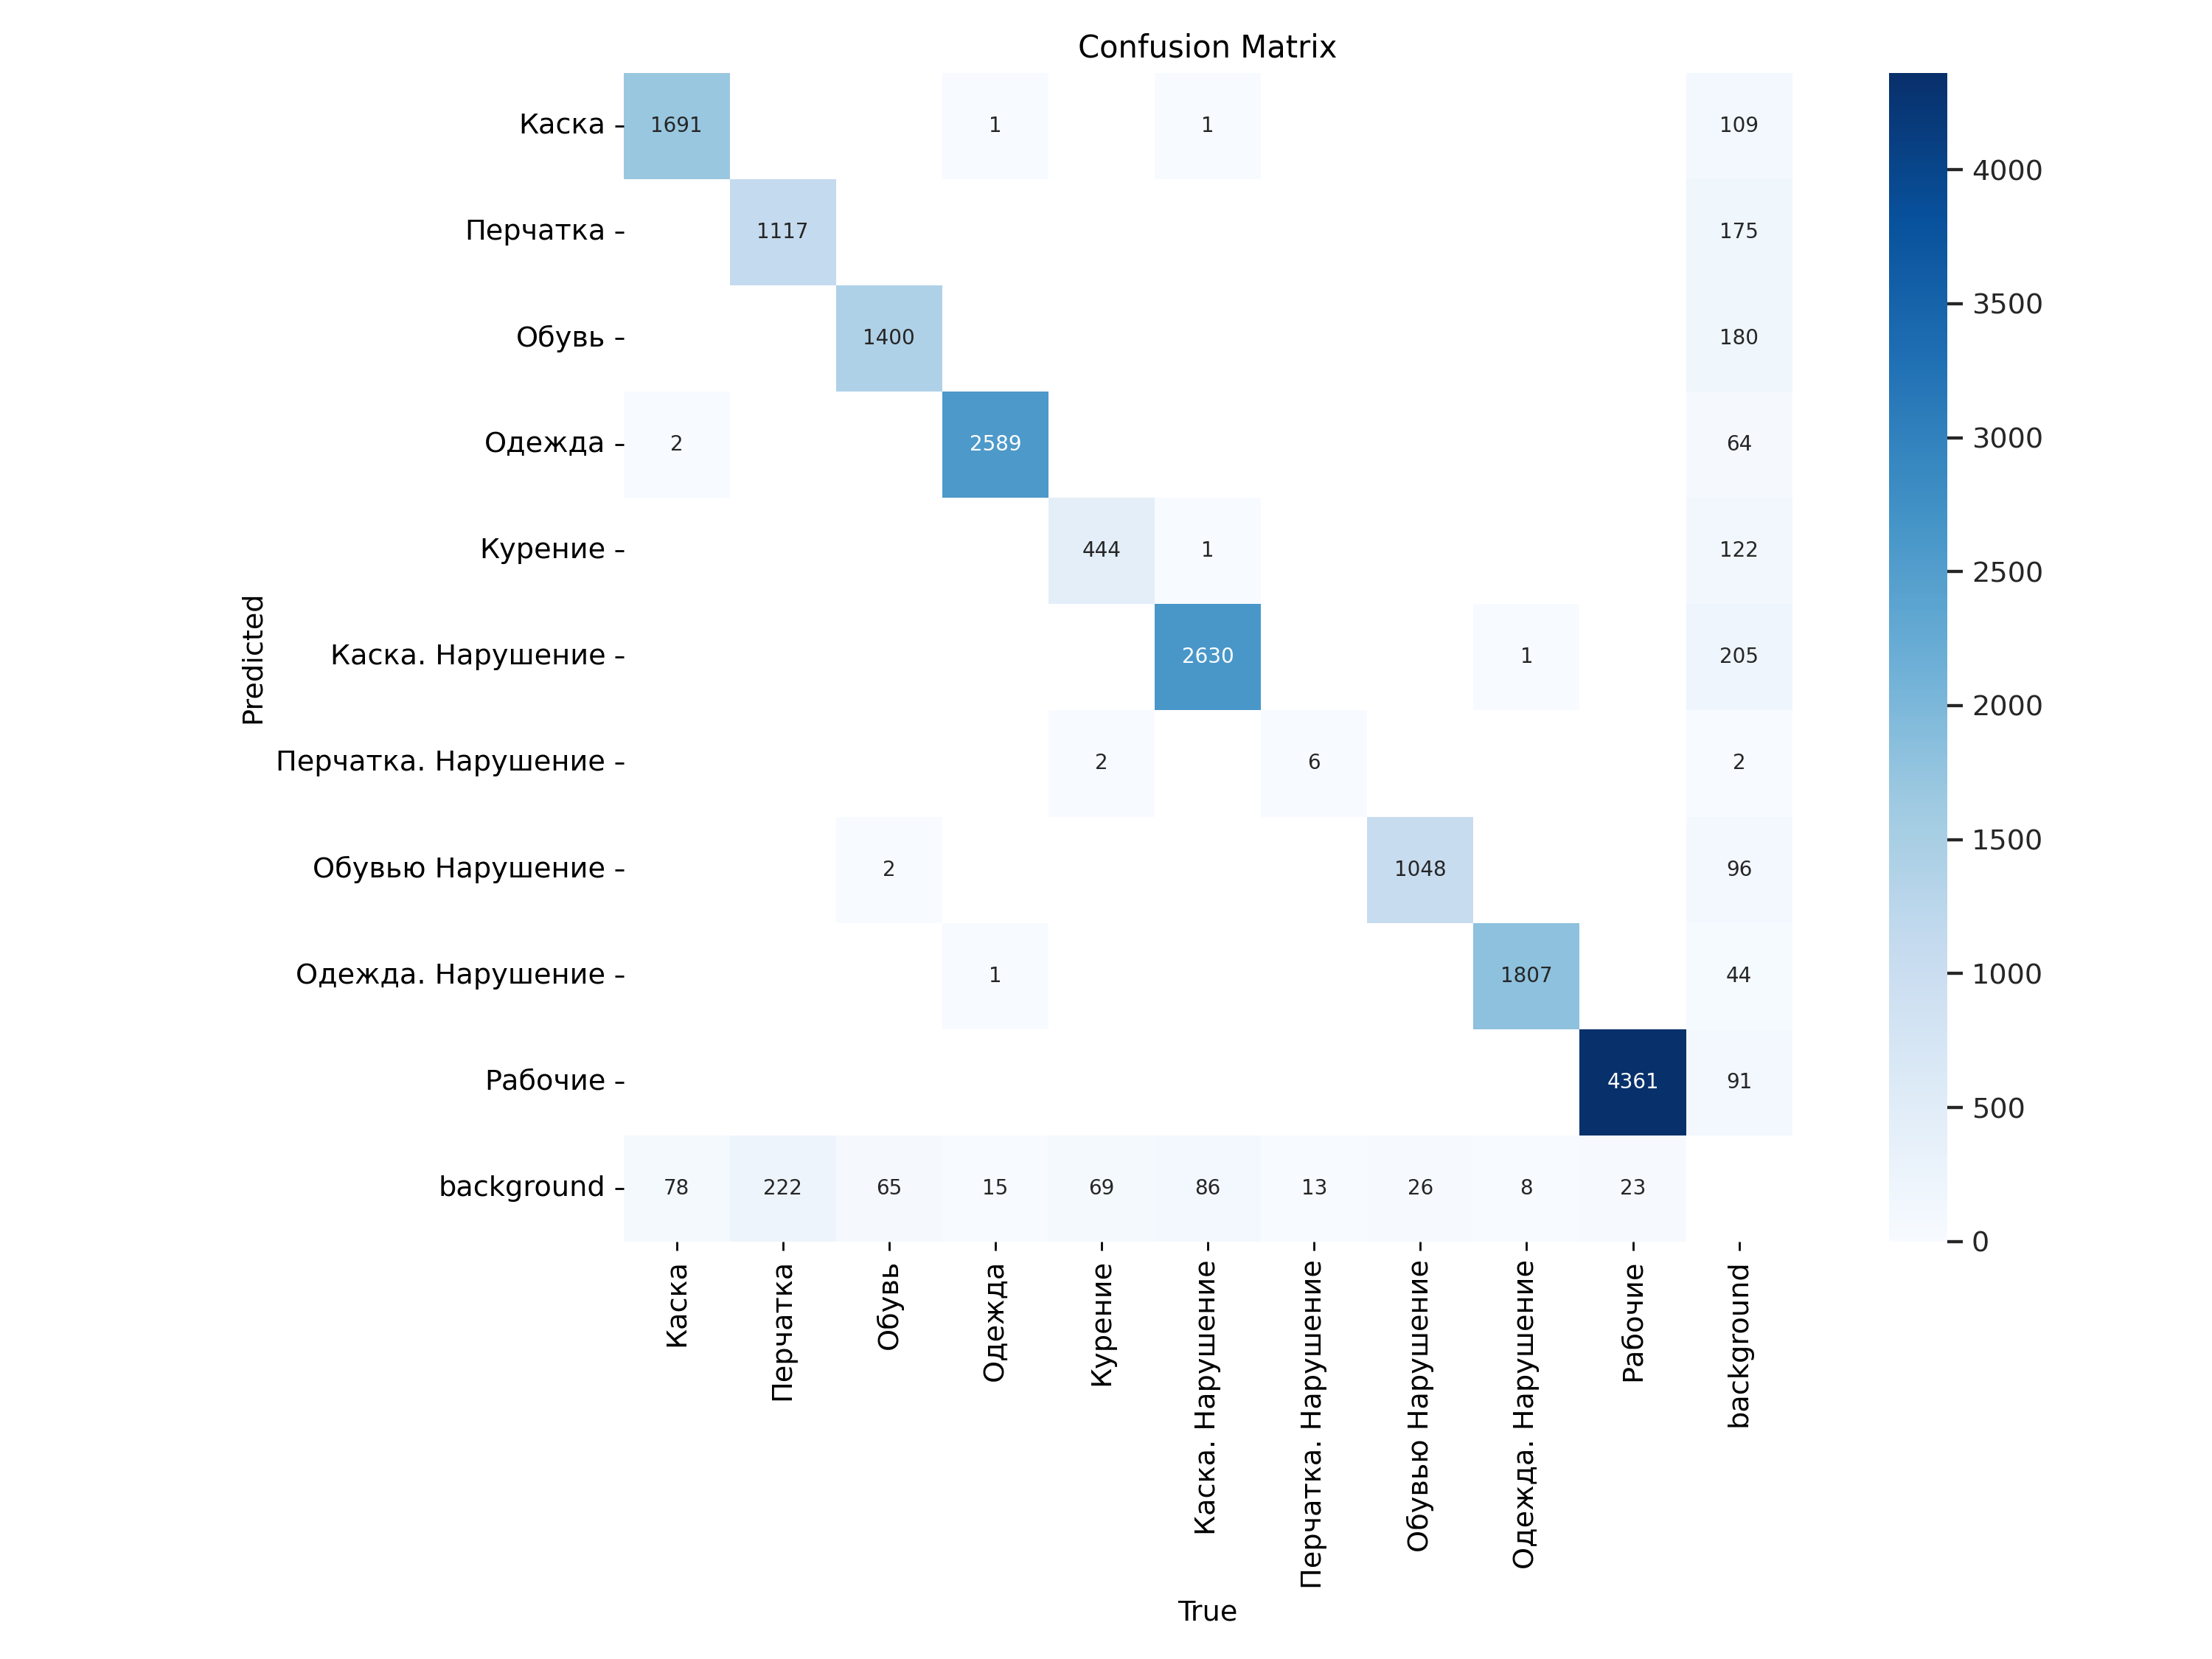

In [12]:
Image(path_result + 'confusion_matrix.png', width=600)

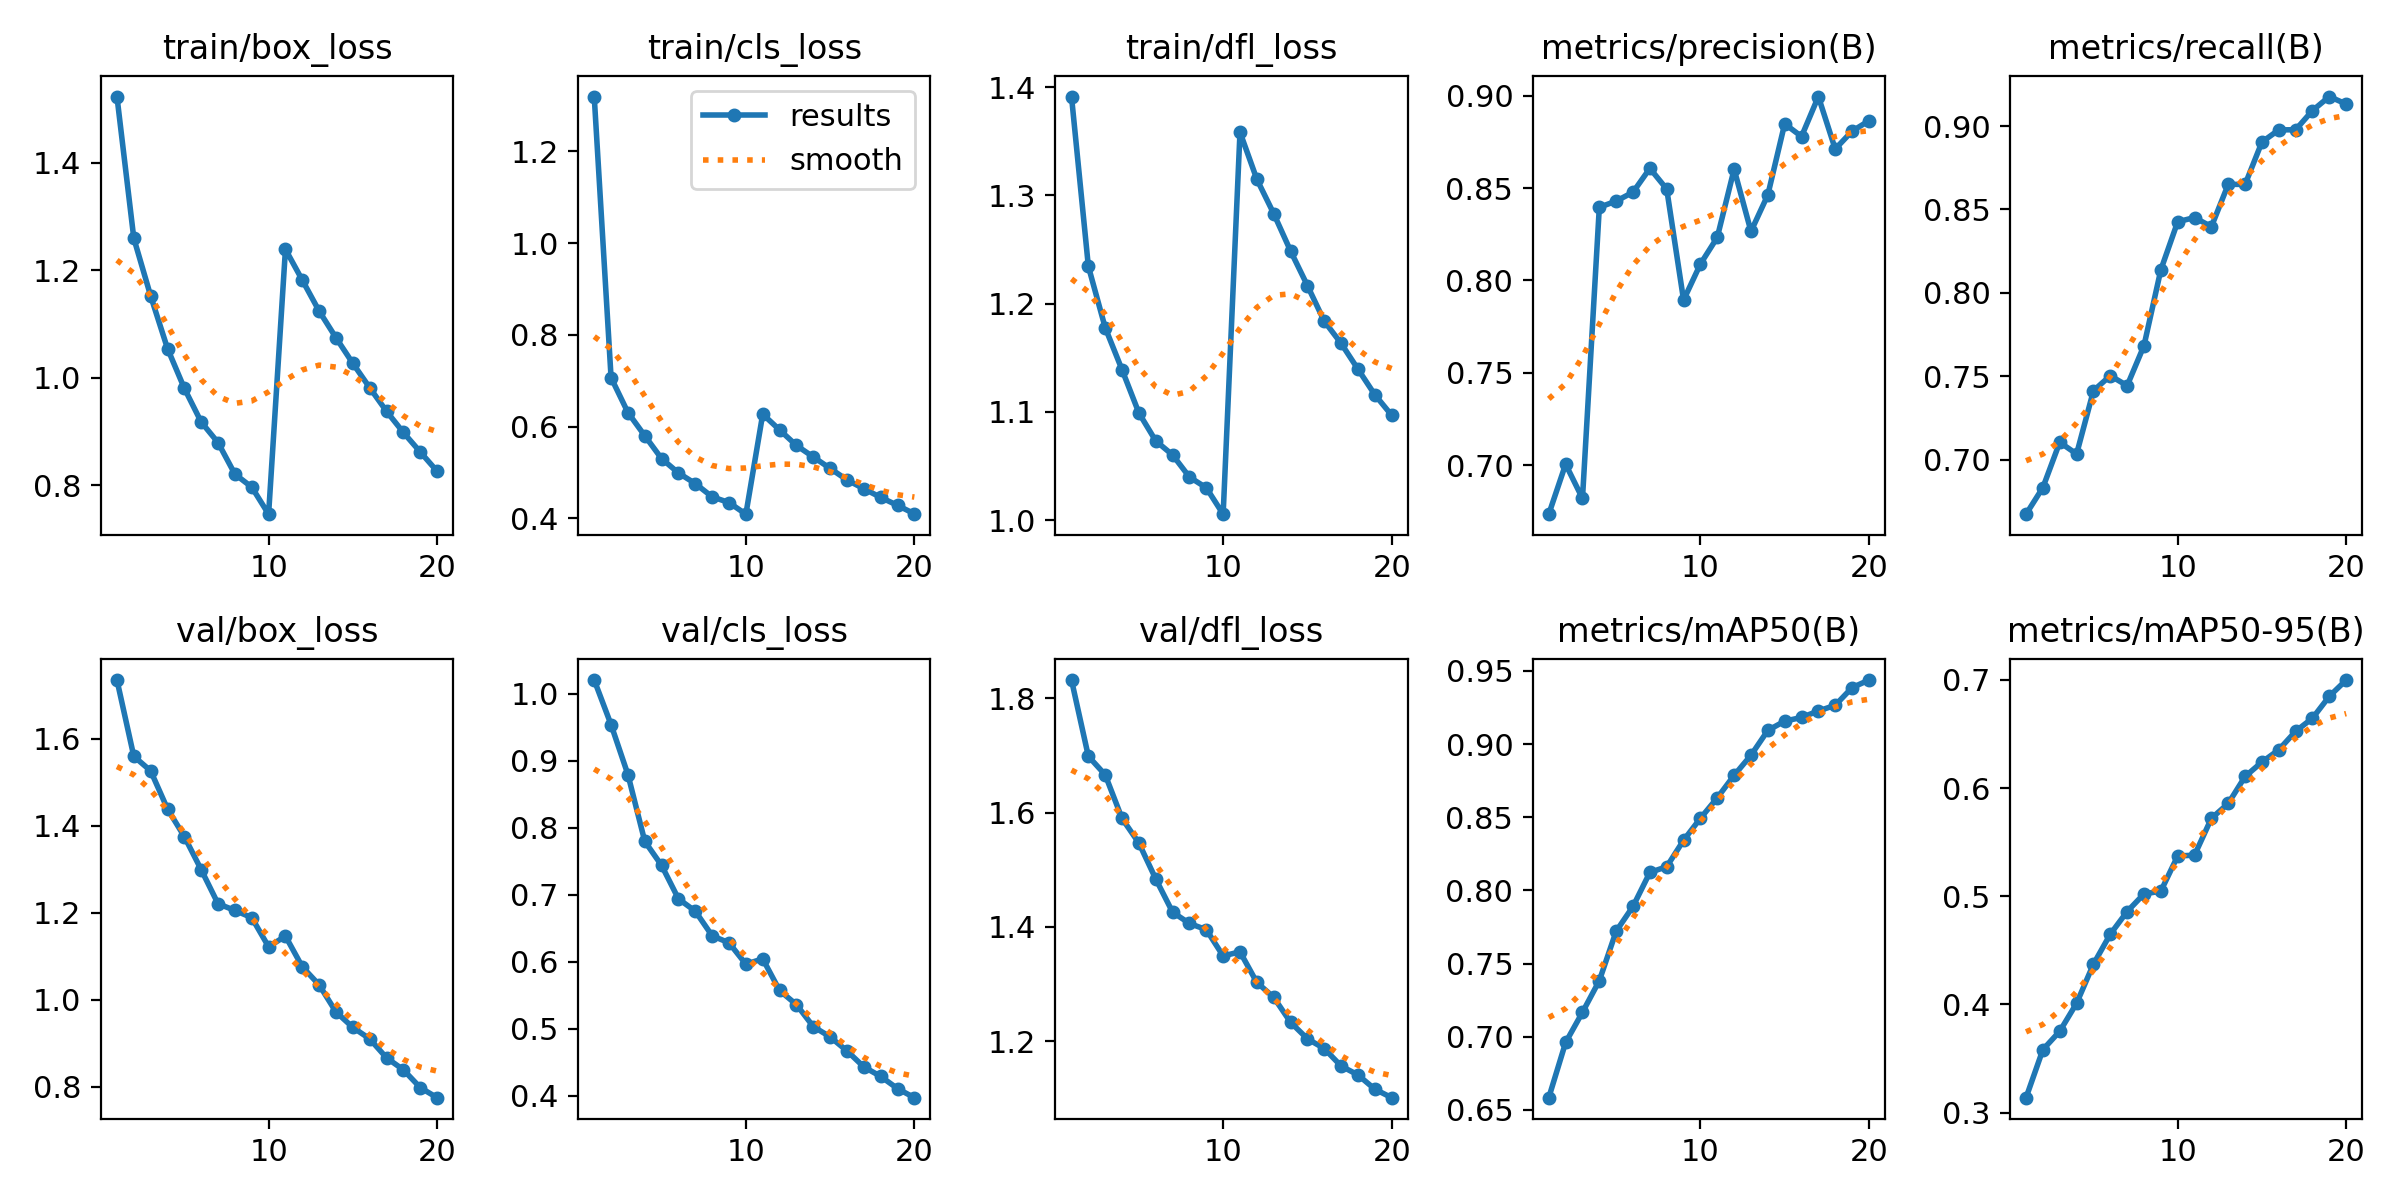

In [13]:
Image(path_result + 'results.png', width=600)